In [1]:
!pip install iapws
from iapws import iapws95, iapws97
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 6.4 MB/s 
  Created wheel for iapws: filename=iapws-1.5.3-py3-none-any.whl size=114281 sha256=a4ba15619ac2cc4acc9fc86a8e299633431eb184f7d2df3e004524b0eca269be
  Stored in directory: /root/.cache/pip/wheels/31/41/85/a38aabccfd7dea1498653150e52ad2b2d7e3a8199263b8e09a
Successfully built iapws


In [2]:
temp = np.arange(1., 500., 2) + 273.15 # in K
pres = np.arange(0.1, 40., .4) # in MPa

palim = pres[::-1] # flip pressure vector. just for viz purposes

tsat = np.arange(274., 648., 2)
psat = np.zeros_like(tsat)

In [3]:
for i,j in enumerate(tsat):
    psat[i] = iapws97._PSat_T(j)

In [4]:
x,y = np.meshgrid(temp,pres[::-1])
hs = np.zeros_like(x)

In [6]:
for i in range(len(temp)):
    for j in range(len(pres)):
        water = iapws95.IAPWS95(T=temp[i], P=pres[::-1][j])
        hs[j, i] = water.h

(0.0, 40.0)

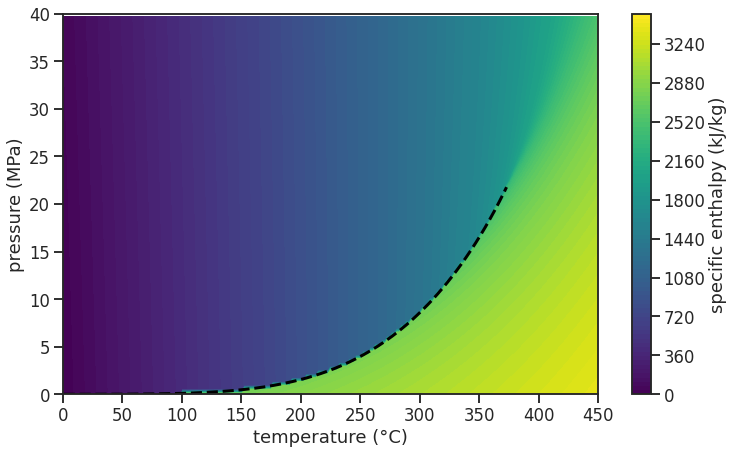

In [7]:
# simple plot of the phase diagram
fig = plt.figure(figsize=[12,7])
cs = plt.contourf(x - 273.15, y, hs,100, cmap='viridis')
plt.colorbar(cs, label='specific enthalpy (kJ/kg)')
plt.plot(tsat - 273.15, psat, 'k--', linewidth=3)
plt.xlabel('temperature (°C)')
plt.ylabel('pressure (MPa)')
plt.xlim([0, 450])
plt.ylim([0,40])

##In modelling geothermal systems, especially high enthalpy geothermal systems, we have often to consider two phases. Liquid water and steam. One interesting observation we can make when water starts boiling, is that there is a discontinuity, a jump in the systems enthalpy, when water goes from its liquid phase into the steam phase.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


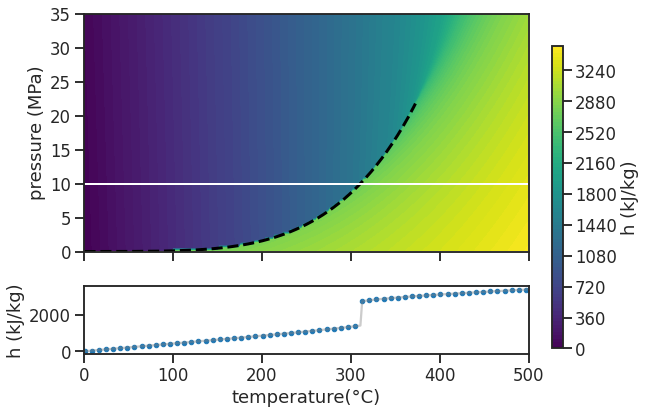

In [8]:
# make a figure with a horizontal slice at 10 MPa and plot the change in enthalpy
fig, ax = plt.subplots(2, 1, figsize=[8, 6], gridspec_kw={'height_ratios': [3.5, 1]}, sharex=True)
cs = ax[0].contourf(x - 273.15, y, hs, 100, cmap='viridis')
ax[0].plot(tsat - 273.15, psat, 'k--', linewidth=3)
ax[0].axhline(y=10, linewidth=2, color='white')
ax[0].set_ylabel('pressure (MPa)')
ax[0].set_xlim([0,500])
ax[0].set_ylim([0,35])

ax[1].plot(temp[::4] - 273.15, hs[74,::4], '.')
ax[1].plot(temp-273.15, hs[74,:], color='gray', alpha=.4)
ax[1].set_ylabel('h (kJ/kg)')
ax[1].set_xlabel('temperature(°C)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.98, .18, .018, .7])
fig.colorbar(cs, cax=cbar_ax, label='h (kJ/kg)')
fig.tight_layout();

fig.savefig('phasediagram.png', dpi=300, bbox_inches='tight')

## References
### https://pypi.org/project/iapws/